![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples//colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_apple_twitter.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Apple Tweets Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 


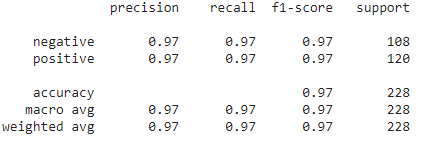


You can achieve these results or even better on this dataset with test data :

<br>

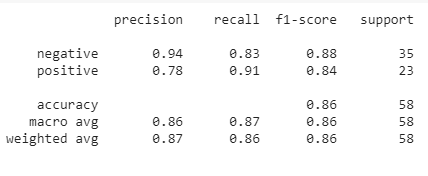

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 06:21:47--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 06:21:47 (1.60 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 62kB/s 
     |████████████████████████████████| 153kB 33.2MB/s 
     |████████████████████████████████| 204kB 16.6MB/s 
     |████████████████████████████████| 204kB 37.7MB/s 


# 2. Download appple twitter  Sentiment dataset 
https://www.kaggle.com/seriousran/appletwittersentimenttexts

this dataset contains tweets made towards apple and today we are going to train our model to predict whether the tweet contains sentiment!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/apple-twitter-sentiment-texts_multi_lingual.csv


--2021-05-05 06:24:08--  http://ckl-it.de/wp-content/uploads/2021/02/apple-twitter-sentiment-texts_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48565 (47K) [text/csv]
Saving to: ‘apple-twitter-sentiment-texts_multi_lingual.csv’

apple-twitter-senti 100%[===================>]  47.43K   237KB/s    in 0.2s    

2021-05-05 06:24:09 (237 KB/s) - ‘apple-twitter-sentiment-texts_multi_lingual.csv’ saved [48565/48565]



In [ ]:
import pandas as pd
train_path = '/content/apple-twitter-sentiment-texts_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
233,@Apple @iCloud Family in-app purchase approval...,negative
120,@apple#ipad #irig For the price to connect my...,negative
240,@Apple Stop liking man.,negative
28,fucking @apple are memer FAGGOTS http://t.co/w...,negative
236,RT @gxldblvnts: thanking @apple for the 'do no...,positive
...,...,...
51,I love @AIRMILES! Between @chaptersindigo &amp...,positive
210,Take the stress out of looking for Christmas p...,positive
98,It would be nice if I could type more than one...,negative
227,Always so impressed with the customer service ...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  

trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97       108
    positive       0.97      0.97      0.97       120

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



,text,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,y,trained_sentiment
0,@Apple @iCloud Family in-app purchase approval...,233,0.999632,[@Apple @iCloud Family in-app purchase approva...,"[-0.005896878894418478, 0.00783093087375164, 0...",@Apple @iCloud Family in-app purchase approval...,negative,negative
1,@apple#ipad #irig For the price to connect my...,120,0.998172,[@apple#ipad #irig For the price to connect my...,"[-0.03121807612478733, 0.0023986243177205324, ...",@apple#ipad #irig For the price to connect my ...,negative,negative
2,@Apple Stop liking man.,240,0.999984,[@Apple Stop liking man.],"[-0.042748626321554184, 0.02048809453845024, 0...",@Apple Stop liking man.,negative,negative
3,fucking @apple are memer FAGGOTS http://t.co/w...,28,0.999970,[fucking @apple are memer FAGGOTS http://t.co/...,"[0.011834759265184402, -0.05850285664200783, 0...",fucking @apple are memer FAGGOTS http://t.co/w...,negative,negative
4,RT @gxldblvnts: thanking @apple for the 'do no...,236,0.999951,[RT @gxldblvnts: thanking @apple for the 'do n...,"[-0.00759833725169301, -0.02228071726858616, 0...",RT @gxldblvnts: thanking @apple for the 'do no...,positive,positive
...,...,...,...,...,...,...,...,...
223,I love @AIRMILES! Between @chaptersindigo &amp...,51,0.999980,"[I love @AIRMILES!, Between @chaptersindigo &a...","[-0.034336768090724945, -0.02440302073955536, ...",I love @AIRMILES! Between @chaptersindigo &amp...,positive,positive
224,Take the stress out of looking for Christmas p...,210,0.999983,[Take the stress out of looking for Christmas ...,"[-0.03665369004011154, -0.04174784570932388, -...",Take the stress out of looking for Christmas p...,positive,positive
225,It would be nice if I could type more than one...,98,0.995613,[It would be nice if I could type more than on...,"[0.0202105101197958, -0.010581637732684612, -0...",It would be nice if I could type more than one...,negative,negative
226,Always so impressed with the customer service ...,227,1.000000,[Always so impressed with the customer service...,"[-0.05745420977473259, 0.03164859488606453, -0...",Always so impressed with the customer service ...,positive,positive


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


              precision    recall  f1-score   support

    negative       0.94      0.83      0.88        35
    positive       0.78      0.91      0.84        23

    accuracy                           0.86        58
   macro avg       0.86      0.87      0.86        58
weighted avg       0.87      0.86      0.86        58



#4.  Test Model  on 20  languages!

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/apple-twitter-sentiment-texts_multi_lingual.csv')
columns=['test_sentences','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
train_df
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.93      0.89      0.91        47
    positive       0.91      0.94      0.93        53

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



,text,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,y,trained_sentiment
0,"@Apple, du skal sortere dine telefoner.",0,0.808998,"[@Apple, du skal sortere dine telefoner.]","[-0.061579205095767975, -0.006414646748453379,...","@Apple, du skal sortere dine telefoner.",negative,positive
1,వావ్. యాల్ నీడా స్టెప్ అప్ @ యాపిల్ ఆర్టి y హే...,1,0.949447,[వావ్. యాల్ నీడా స్టెప్ అప్ @ యాపిల్ ఆర్టి y హ...,"[-0.06188163533806801, -0.07130676507949829, -...",వావ్. యాల్ నీడా స్టెప్ అప్ @ యాపిల్ ఆర్టి y హే...,negative,negative
2,আমি আশ্চর্য হয়েছি যে গতকাল # এএপএল-তে ফ্ল্যাশ...,2,0.817636,[আমি আশ্চর্য হয়েছি যে গতকাল # এএপএল-তে ফ্ল্যা...,"[-0.009524044580757618, -0.022813592106103897,...",আমি আশ্চর্য হয়েছি যে গতকাল # এএপএল-তে ফ্ল্যাশ...,negative,negative
3,"Uvědomili jsme si, že @apple vyrábí obrovské t...",3,0.987724,"[Uvědomili jsme si, že @apple vyrábí obrovské ...","[-0.05080719664692879, 0.035508085042238235, 0...","Uvědomili jsme si, že @apple vyrábí obrovské t...",negative,positive
4,Apple Inc.'s administrerende direktør donerer ...,4,1.000000,[Apple Inc.'s administrerende direktør donerer...,"[-0.04884444922208786, -0.02654154971241951, 0...",Apple Inc.'s administrerende direktør donerer ...,positive,positive
...,...,...,...,...,...,...,...,...
95,Təşəkkür edirəm @Apple İndi bir yerdə ünsiyyət...,95,0.999454,[Təşəkkür edirəm @Apple İndi bir yerdə ünsiyyə...,"[-0.03029252029955387, -0.0471813827753067, -0...",Təşəkkür edirəm @Apple İndi bir yerdə ünsiyyət...,positive,positive
96,. @ tim_cook Die woede wanneer hulle @ Apple G...,96,0.990521,[. @ tim_cook Die woede wanneer hulle @ Apple ...,"[0.01344149000942707, -0.05397084355354309, -0...",. @ tim_cook Die woede wanneer hulle @ Apple G...,negative,negative
97,ছদ্মবেশের ধরণটি হ'ল এই @ অ্যাপল @ অটোকোরেক্ট @...,97,0.993052,[ছদ্মবেশের ধরণটি হ'ল এই @ অ্যাপল @ অটোকোরেক্ট ...,"[-0.028785958886146545, -0.06805533170700073, ...",ছদ্মবেশের ধরণটি হ'ল এই @ অ্যাপল @ অটোকোরেক্ট @...,negative,negative
98,"Было бы неплохо, если бы я мог набрать более о...",98,0.815481,"[Было бы неплохо, если бы я мог набрать более ...","[0.0006764091667719185, -0.0028165546245872974...","Было бы неплохо, если бы я мог набрать более о...",negative,positive


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:

fitted_pipe.predict("I hate the newest update!! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999776,"[I hate the newest update!, !]","[-0.03925566002726555, -0.020373696461319923, ...",I hate the newest update!!,negative


In [ ]:
fitted_pipe.predict("I love the newest update!! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999902,"[I love the newest update!, !]","[-0.03266981244087219, -0.03438195958733559, -...",I love the newest update!!,positive


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# german for: 'I love the newest update!!'
fitted_pipe.predict("Ich liebe das neueste Update !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999718,"[Ich liebe das neueste Update !, !]","[-0.03806369751691818, -0.03677768632769585, -...",Ich liebe das neueste Update !!,positive


In [ ]:
# german for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("Apple ist das schlechteste Unternehmen aller Zeiten, ich hasse es! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999974,[Apple ist das schlechteste Unternehmen aller ...,"[-0.06440500915050507, 0.011019382625818253, -...",Apple ist das schlechteste Unternehmen aller Z...,negative


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'I hate the newest update!!'
fitted_pipe.predict("我讨厌最新的更新！ ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999468,[我讨厌最新的更新！],"[-0.0359969362616539, -0.03859588876366615, 0....",我讨厌最新的更新！,negative


In [ ]:
# Chinese for: 'I love the newest update!!'
fitted_pipe.predict("我喜欢最新的更新！ ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999998,[我喜欢最新的更新！],"[-0.03270617872476578, -0.03804901987314224, -...",我喜欢最新的更新！,positive


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
		
#  Afrikaans for: 'I hate the newest update!!'
fitted_pipe.predict("Ek haat die nuutste opdatering !! ")


,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999861,[Ek haat die nuutste opdatering !!],"[-0.043201908469200134, -0.023186631500720978,...",Ek haat die nuutste opdatering !!,negative


In [ ]:
#  Afrikaans for: 'I love the newest update!!'
fitted_pipe.predict("Ek is lief vir die nuutste opdatering !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999924,[Ek is lief vir die nuutste opdatering !!],"[-0.03175487741827965, -0.03518300876021385, -...",Ek is lief vir die nuutste opdatering !!,positive


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:

# Vietnamese for: 'I love the newest update!!'
fitted_pipe.predict("Tôi yêu bản cập nhật mới nhất !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999969,"[Tôi yêu bản cập nhật mới nhất !, !]","[-0.00781381968408823, -0.0691518485546112, -0...",Tôi yêu bản cập nhật mới nhất !!,positive


In [ ]:

# Vietnamese for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("Apple là công ty tồi tệ nhất từ ​​trước đến nay, tôi ghét nó!")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.99895,[Apple là công ty tồi tệ nhất từ ​​trước đến n...,"[-0.06147113814949989, 0.03707527741789818, 0....",Apple là công ty tồi tệ nhất từ ​​trước đến na...,negative


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'I hate the newest update!!'
fitted_pipe.predict("私は最新のアップデートが嫌いです！ ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999842,[私は最新のアップデートが嫌いです！],"[-0.030076516792178154, -0.002390763023868203,...",私は最新のアップデートが嫌いです！,negative


In [ ]:
		
# Japanese for: 'I love the newest update!!'
fitted_pipe.predict("私は最新のアップデートが大好きです！ ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999998,[私は最新のアップデートが大好きです！],"[-0.01563793420791626, -0.022478925064206123, ...",私は最新のアップデートが大好きです！,positive


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'I love the newest update!!'
fitted_pipe.predict("Ngiyasithanda isibuyekezo esisha !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999417,"[Ngiyasithanda isibuyekezo esisha !, !]","[-0.018757890909910202, -0.03155702352523804, ...",Ngiyasithanda isibuyekezo esisha !!,positive


In [ ]:
#  Zulu for: Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("I-Apple iyinkampani embi kunazo zonke ezake, ngiyayizonda!")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999329,"[I-Apple iyinkampani embi kunazo zonke ezake, ...","[-0.06040400266647339, 0.025964893400669098, 0...","I-Apple iyinkampani embi kunazo zonke ezake, n...",negative


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'I hate the newest update!!'
fitted_pipe.predict("En yeni güncellemekten nefret ediyorum !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.99968,"[En yeni güncellemekten nefret ediyorum !, !]","[-0.006802674848586321, -0.03453182056546211, ...",En yeni güncellemekten nefret ediyorum !!,negative


In [ ]:
#  Turkish for: 'I love the newest update!!'
fitted_pipe.predict("En yeni güncellemeyi seviyorum !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999978,"[En yeni güncellemeyi seviyorum !, !]","[-0.013165195472538471, -0.04192955046892166, ...",En yeni güncellemeyi seviyorum !!,positive


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'I hate the newest update!!'
fitted_pipe.predict("אני שונא את העדכון החדש ביותר! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999878,[אני שונא את העדכון החדש ביותר!],"[-0.026791388168931007, -0.024923792108893394,...",אני שונא את העדכון החדש ביותר!,negative


In [ ]:
# Hebrew for: 'I love the newest update!!'
fitted_pipe.predict("אני אוהב את העדכון החדש ביותר !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999993,[אני אוהב את העדכון החדש ביותר !!],"[-0.025626346468925476, -0.03748653084039688, ...",אני אוהב את העדכון החדש ביותר !!,positive


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'I love the newest update!!'
fitted_pipe.predict("నేను సరికొత్త నవీకరణను ప్రేమిస్తున్నాను !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999994,[నేను సరికొత్త నవీకరణను ప్రేమిస్తున్నాను !!],"[-0.035736482590436935, -0.04187411442399025, ...",నేను సరికొత్త నవీకరణను ప్రేమిస్తున్నాను !!,positive


In [ ]:
# Telugu for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict(" ఆపిల్ ఎప్పుడూ చెత్త సంస్థ, నేను దానిని ద్వేషిస్తున్నాను!  ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999924,"[ఆపిల్ ఎప్పుడూ చెత్త సంస్థ, నేను దానిని ద్వేషి...","[-0.06062706932425499, 0.014408073388040066, -...","ఆపిల్ ఎప్పుడూ చెత్త సంస్థ, నేను దానిని ద్వేషిస...",negative


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'I hate the newest update!!'
fitted_pipe.predict("Я ненавижу новейшее обновление !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999845,[Я ненавижу новейшее обновление !!],"[-0.05251258984208107, -0.02137317694723606, -...",Я ненавижу новейшее обновление !!,negative


In [ ]:


#  Russian for: 'I love the newest update!!'
fitted_pipe.predict("Я люблю новейшее обновление !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999972,[Я люблю новейшее обновление !!],"[-0.04557504504919052, -0.0393301285803318, -0...",Я люблю новейшее обновление !!,positive


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'I hate the newest update!!'
fitted_pipe.predict("مجھے تازہ ترین اپ ڈیٹ سے نفرت ہے !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999563,"[مجھے تازہ ترین اپ ڈیٹ سے نفرت ہے !, !]","[-0.042040981352329254, -0.040164750069379807,...",مجھے تازہ ترین اپ ڈیٹ سے نفرت ہے !!,negative


In [ ]:
# Urdu for: 'I love the newest update!!'
fitted_pipe.predict("مجھے تازہ ترین تازہ کاری پسند ہے !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999973,"[مجھے تازہ ترین تازہ کاری پسند ہے !, !]","[-0.020344950258731842, -0.050028372555971146,...",مجھے تازہ ترین تازہ کاری پسند ہے !!,positive


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'I hate the newest update!!'
fitted_pipe.predict("मुझे नवीनतम अपडेट से नफरत है !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999722,"[मुझे नवीनतम अपडेट से नफरत है !, !]","[-0.045306481420993805, -0.038678351789712906,...",मुझे नवीनतम अपडेट से नफरत है !!,negative


In [ ]:
# hindi for: 'I love the newest update!!'
fitted_pipe.predict("मैं नवीनतम अद्यतन प्यार करता हूँ !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999919,[मैं नवीनतम अद्यतन प्यार करता हूँ !!],"[-0.03802281618118286, -0.04779476672410965, -...",मैं नवीनतम अद्यतन प्यार करता हूँ !!,positive


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'I hate the newest update!!'
fitted_pipe.predict("Мин яңа яңартуны нәфрәт итәм !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999187,[Мин яңа яңартуны нәфрәт итәм !!],"[-0.038122836500406265, -0.03321803733706474, ...",Мин яңа яңартуны нәфрәт итәм !!,negative


In [ ]:

# Tartar for: 'I love the newest update!!'
fitted_pipe.predict("Мин иң яңа яңартуны яратам !! ")
	

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999963,[Мин иң яңа яңартуны яратам !!],"[-0.022450288757681847, -0.04027746245265007, ...",Мин иң яңа яңартуны яратам !!,positive


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'I hate the newest update!!'
fitted_pipe.predict("Je déteste la nouvelle mise à jour !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999315,[Je déteste la nouvelle mise à jour !!],"[-0.0480484776198864, -0.01981555111706257, -0...",Je déteste la nouvelle mise à jour !!,negative


In [ ]:
# French for: 'I love the newest update!!'
fitted_pipe.predict("J'adore la dernière mise à jour !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999959,[J'adore la dernière mise à jour !!],"[-0.03898211941123009, -0.04296712949872017, -...",J'adore la dernière mise à jour !!,positive


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for: 'I hate the newest update!!'
fitted_pipe.predict("ฉันเกลียดการอัปเดตใหม่ล่าสุด !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999806,[ฉันเกลียดการอัปเดตใหม่ล่าสุด !!],"[-0.05030808597803116, -0.03610166534781456, -...",ฉันเกลียดการอัปเดตใหม่ล่าสุด !!,negative


In [ ]:
# Thai for: 'I love the newest update!!'
fitted_pipe.predict("โดนใจอัพเดทใหม่ล่าสุด !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999978,[โดนใจอัพเดทใหม่ล่าสุด !!],"[-0.046895772218704224, -0.04769491031765938, ...",โดนใจอัพเดทใหม่ล่าสุด !!,positive


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'I hate the newest update!!'
fitted_pipe.predict("ខ្ញុំស្អប់ការអាប់ដេតថ្មីបំផុត !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.99968,[ខ្ញុំស្អប់ការអាប់ដេតថ្មីបំផុត !!],"[-0.04094554856419563, -0.04082174971699715, -...",ខ្ញុំស្អប់ការអាប់ដេតថ្មីបំផុត !!,negative


In [ ]:
# Khmer for: 'I love the newest update!!'
fitted_pipe.predict("ខ្ញុំចូលចិត្តការអាប់ដេតថ្មីបំផុត !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.99999,[ខ្ញុំចូលចិត្តការអាប់ដេតថ្មីបំផុត !!],"[-0.03578546270728111, -0.035129521042108536, ...",ខ្ញុំចូលចិត្តការអាប់ដេតថ្មីបំផុត !!,positive


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:

# Yiddish for: 'I love the newest update!!'
fitted_pipe.predict("איך ליבע דער נואַסט דערהייַנטיקן !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999994,[איך ליבע דער נואַסט דערהייַנטיקן !!],"[-0.03009073995053768, -0.060998495668172836, ...",איך ליבע דער נואַסט דערהייַנטיקן !!,positive


In [ ]:

# Yiddish for: 'Apple is the worst company ever  , I hate it !'
fitted_pipe.predict("עפּל איז די ערגסט פירמע טאָמיד, איך האַס עס!")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.717363,"[עפּל איז די ערגסט פירמע טאָמיד, איך האַס עס!]","[-0.0464082695543766, 0.007680143229663372, 0....","עפּל איז די ערגסט פירמע טאָמיד, איך האַס עס!",negative


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
		
# Kygrgyz for: 'I hate the newest update!!'
fitted_pipe.predict("Мен жаңы жаңыртууну жек көрөм !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999657,[Мен жаңы жаңыртууну жек көрөм !!],"[-0.04081014543771744, -0.037187058478593826, ...",Мен жаңы жаңыртууну жек көрөм !!,negative


In [ ]:
		
# Kygrgyz for: 'I love the newest update!!'
fitted_pipe.predict("Мен жаңы жаңыртууну жакшы көрөм !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999925,[Мен жаңы жаңыртууну жакшы көрөм !!],"[-0.02940315194427967, -0.0417410284280777, -0...",Мен жаңы жаңыртууну жакшы көрөм !!,positive


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
		
# Tamil for: 'I hate the newest update!!'
fitted_pipe.predict("நான் புதிய புதுப்பிப்பை வெறுக்கிறேன் !! ")
		

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999217,[நான் புதிய புதுப்பிப்பை வெறுக்கிறேன் !!],"[-0.04580855742096901, -0.03527894616127014, -...",நான் புதிய புதுப்பிப்பை வெறுக்கிறேன் !!,negative


In [ ]:

# Tamil for: 'I love the newest update!!'
fitted_pipe.predict("நான் புதிய புதுப்பிப்பை விரும்புகிறேன் !! ")

,origin_index,trained_sentiment_confidence,sentence,sentence_embedding_labse,document,trained_sentiment
0,0,0.999528,[நான் புதிய புதுப்பிப்பை விரும்புகிறேன் !!],"[-0.0359167717397213, -0.05217977613210678, -0...",நான் புதிய புதுப்பிப்பை விரும்புகிறேன் !!,positive


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('I hate the newest update')
preds

,document,origin_index,text,sentiment,sentiment_confidence,sentence_embedding_from_disk,sentence
0,I hate the newest update,8589934592,I hate the newest update,[negative],[0.9999902],"[[-0.04603002965450287, 0.03271652013063431, 0...",[I hate the newest update]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')              | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_detect